In [29]:
# importing the related library from pyhton
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [30]:
# importing the data from excel
da = pd.read_excel('ex22.xlsx')
da

,Unnamed: 0,Unnamed: 1
0,Sw,Kro/Krw
1,0.2,NaN
2,0.25,30.23
3,0.3,17
4,0.35,9.56
5,0.4,5.38
6,0.45,3.02
7,0.5,1.7
8,0.55,0.96
9,0.6,0.54


In [31]:
# arranging the data in table for favourable condition
da.columns = da.iloc[0]
da = da.drop(da.index[0])
da

,Sw,Kro/Krw
1,0.2,NaN
2,0.25,30.23
3,0.3,17
4,0.35,9.56
5,0.4,5.38
6,0.45,3.02
7,0.5,1.7
8,0.55,0.96
9,0.6,0.54
10,0.65,0.3


In [32]:
# filling the unreadable data
da = da.fillna(0)

In [33]:
# converting the columns in array
# Sw = water saturation
sw = np.array(da['Sw'])
k = np.array(da['Kro/Krw'])
print(sw)
print(k)

[0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8 ]
[ 0.   30.23 17.    9.56  5.38  3.02  1.7   0.96  0.54  0.3   0.17  0.1
  0.  ]


In [34]:
# calculating the fractional flow
# f = 1/(1+ ((uw/uo)(Kro/Krw)) , uw = viscosity of water , uo = viscosity of oil
# uw/uo = 0.5 
f = 1/(1+(0.5*k))
f[0] = 0
f

array([0.        , 0.06205399, 0.10526316, 0.17301038, 0.27100271,
       0.39840637, 0.54054054, 0.67567568, 0.78740157, 0.86956522,
       0.92165899, 0.95238095, 1.        ])

In [35]:
# calculating the dfw/dsw
q = [0]
for i in range(0,13):
    if i == 12:
        break
    s = (f[i]-f[i+1])/(sw[i]-sw[i+1])
    
    q.append(s)

In [36]:
q

[0,
 1.2410797393732549,
 0.8641834185214823,
 1.3549444545620106,
 1.9598465880852594,
 2.548073289497836,
 2.8426833207709685,
 2.7027027027027044,
 2.234517982549476,
 1.6432728517630963,
 1.0418753756762147,
 0.6144393241167417,
 0.9523809523809547]

Text(0, 0.5, 'f')

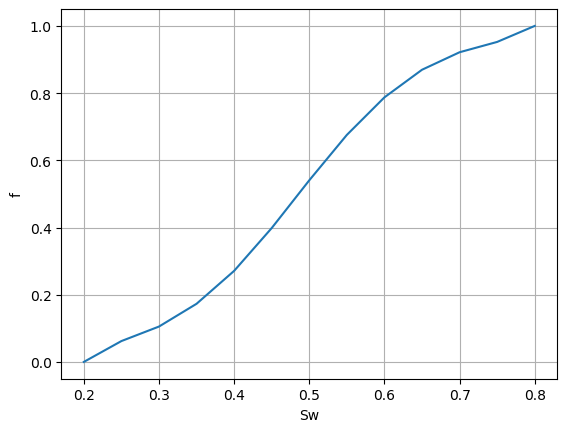

In [37]:
# visulization of the data by plotting f vs Sw  
slope = q
plt.style.use('default')
plt.plot(sw,f)
plt.grid(True)
plt.xlabel('Sw')
plt.ylabel('f')

In [38]:
#adding the calculated data into dataframe
da['dfw/dsw'] = slope
da['fw'] = f

,Sw,Kro/Krw,dfw/dsw,fw
1,0.20,0.00,0.000000,0.000000
2,0.25,30.23,1.241080,0.062054
3,0.30,17.00,0.864183,0.105263
4,0.35,9.56,1.354944,0.173010
5,0.40,5.38,1.959847,0.271003
6,0.45,3.02,2.548073,0.398406
7,0.50,1.70,2.842683,0.540541
8,0.55,0.96,2.702703,0.675676
9,0.60,0.54,2.234518,0.787402
10,0.65,0.30,1.643273,0.869565


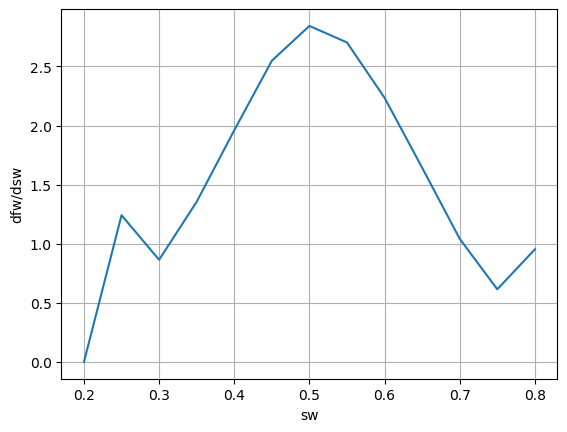

In [39]:
# visulazation of the data by plot of dfw/dsw vs Sw
plt.style.use('default')
plt.plot(sw,slope)
plt.grid(True)
plt.xlabel('sw')
plt.ylabel('dfw/dsw')
da

In [40]:
# rearranging the columns into dataframe
da = da[['Sw','Kro/Krw','fw','dfw/dsw']]

In [41]:
# dataframe after arranging columns in particular order
da

,Sw,Kro/Krw,fw,dfw/dsw
1,0.20,0.00,0.000000,0.000000
2,0.25,30.23,0.062054,1.241080
3,0.30,17.00,0.105263,0.864183
4,0.35,9.56,0.173010,1.354944
5,0.40,5.38,0.271003,1.959847
6,0.45,3.02,0.398406,2.548073
7,0.50,1.70,0.540541,2.842683
8,0.55,0.96,0.675676,2.702703
9,0.60,0.54,0.787402,2.234518
10,0.65,0.30,0.869565,1.643273
